In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Dataset Exploration

## 1.1 Visualize csv file

In [2]:
df = pd.read_csv('gs://oro-ds-test-bucket/shanel_test/raw_image_paths_from_db.csv')
df.head(5)

,Unnamed: 0,pathBucketImage,labelledby,reviewedby,acne_comedos,acne_cystic,acne_mixed,acne_scars,acne_excoriated,rosacea_erythemato_telangiectasique,...,keratosis_pilaris,molluscum,folliculitis,melanonychia,nevus,lichen_planus,chelitis_actinic,cheilitis_eczematous,urticaria,unspecified
0,0,7830/646B3FD8EE/ailment_photos/AP-c1bbfaeb-178...,Guillemette Salomon,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,9369/005F4BC9BC/ailment_photos/AP-231d589b-377...,Guillemette Salomon,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2,936/E617F7DF5F/ailment_photos/AP-cc6f0aa7-75a6...,Guillemette Salomon,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,9716/7C41A121CF/ailment_photos/AP-5643b306-19d...,Guillemette Salomon,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,4,9718/BF893BCA47/ailment_photos/AP-0743efe6-50a...,Guillemette Salomon,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [3]:
df=df[~df.pathBucketImage.str.contains("resized")].reset_index(drop=True)

In [4]:
print(f'There are {df.shape[0]} images in the dataset')

There are 42275 images in the dataset


In [5]:
print(f"These are the labelers: {df['labelledby'].unique()}")

These are the labelers: ['Guillemette Salomon' 'Marc-Andre Dore' nan]


In [6]:
# See time intervall between images
df['dateInserted'] =pd.to_datetime(df['dateInserted'])
print(df['dateInserted'].min())
print(df['dateInserted'].max())

2020-12-23 00:00:00
2021-11-30 00:00:00


## 1.2 Drop columns that are not a label

In this section, we also remove the labels that are not used in the current pipeline.

In [7]:
# drop all columsn except labels
df_40 = df.drop(columns=['Unnamed: 0', 'pathBucketImage', 'labelledby', 'reviewedby',
                     'dateInserted'])

In [8]:
all_columns = set(df_40.columns)

In [9]:
columns = set(['acne_mixed','acne_scars', 'atopic_dermatitis','acne_cystic','acne_excoriated','rosacea_inflammatory','rosacea_erythemato_telangiectasique','acne_comedos','peri_oral_dermatitis','seborrheic_keratosis','psoriasis_vulgar','seborrheic_dermatitis','nummular_eczema','tinea_versicolor','chronic_hand_eczema','vulgar_warts','folliculitis','alopecia_androgenic','dyshidrosis','nevus','melasma','alopecia_areata','intertrigo','urticaria','vitiligo','keratosis_pilaris','molluscum','cheilitis_eczematous','tinea_corporis','prurigo_nodularis','actinic_keratosis','genital_warts','plane_warts','pityriasis_rosae','melanonychia','psoriasis_pustular_palmoplantar','granuloma_annulare','psoriasis_guttate','lichen_simplex_chronicus','shingles','herpes_simplex'])


In [10]:
# these labels are discared since we do not have enough images
# and other and unspecified are the ones that may have other diseases or the doctors could not identify it.
columns_discarded = all_columns - columns
columns_discarded

{'chelitis_actinic',
 'lichen_planus',
 'no_disease',
 'other',
 'psoriasis_inverse',
 'rosacea_rhinophyma',
 'unspecified'}

In [12]:
df_40 = df_40[all_columns.intersection(columns)]
df_40.head(10)

,acne_excoriated,tinea_versicolor,shingles,acne_scars,molluscum,rosacea_erythemato_telangiectasique,acne_mixed,psoriasis_vulgar,dyshidrosis,keratosis_pilaris,...,rosacea_inflammatory,seborrheic_dermatitis,seborrheic_keratosis,acne_cystic,granuloma_annulare,chronic_hand_eczema,tinea_corporis,psoriasis_pustular_palmoplantar,urticaria,alopecia_androgenic
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 1.3 Remove images with no label (False for every column)

In [14]:
n = 0
index = []
for i, row in df_40.iterrows():
    if any(row.values): 
        n += 1
        index.append(i)
index = np.array(index)
print(n)

21886


In [15]:
df_40 = df_40.iloc[index]

## 1.4 Remove images with more than one label

In [16]:
n = 0
one_label_index = []
for i, row in df_40.iterrows():
    if sum(row.values)==1: 
        n += 1
        one_label_index.append(i)
print(n)
df_one_label = df_40.loc[one_label_index]

20274


In [17]:
print(f' In the current pipeline, there are {df_one_label.shape[0]} labeled  images.')

 In the current pipeline, there are 20274 labeled  images.


## 1.5 Visualize label distributions

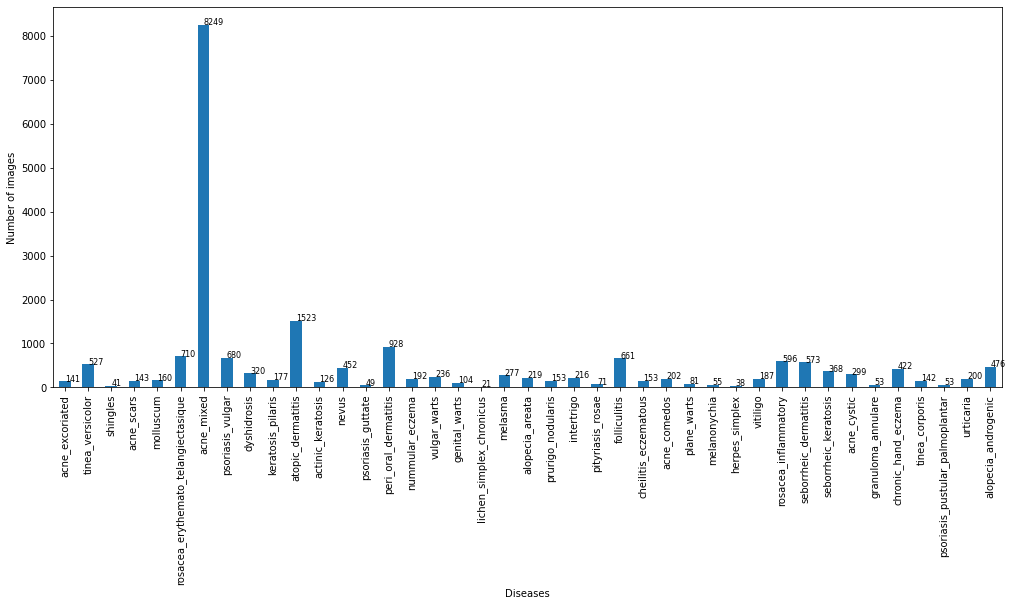

In [18]:
plt.figure(figsize=(17,7))
df_one_label.sum().plot(kind='bar')
plt.ylabel('Number of images')
plt.xlabel('Diseases')
for index, data in enumerate(df_one_label.sum()):
  plt.text(x=index, y=data+0.5, s=f'{data}', fontdict=dict(fontsize=8))
plt.show()

In [31]:
print(f'Without acne mixed, there are {df_acne.shape[0]} images.')

Without acne mixed, there are 0 images.


In [32]:
df_acne.loc[:].apply(lambda x: tuple(df_acne.columns[np.argwhere(x.values== True).flatten()]), axis=1).value_counts()

Series([], dtype: int64)

# Binary Classification

In [160]:
columns = ['atopic_dermatitis','rosacea_inflammatory','rosacea_erythemato_telangiectasique','peri_oral_dermatitis','seborrheic_keratosis','psoriasis_vulgar','seborrheic_dermatitis','nummular_eczema','tinea_versicolor','chronic_hand_eczema','vulgar_warts','folliculitis','alopecia_androgenic','dyshidrosis','nevus','melasma','alopecia_areata','intertrigo','urticaria','vitiligo','keratosis_pilaris','molluscum','cheilitis_eczematous','tinea_corporis','prurigo_nodularis','actinic_keratosis','genital_warts','plane_warts','pityriasis_rosae','melanonychia','psoriasis_pustular_palmoplantar','granuloma_annulare','psoriasis_guttate','lichen_simplex_chronicus','shingles','herpes_simplex']
classes_mixed =  ['acne_cystic', 'acne_scars', 'acne_mixed', 'acne_excoriated', 'acne_comedos']

In [161]:
df_binary = df.copy()

In [162]:
all_columns = columns.copy()
all_columns.extend(classes_mixed)

In [163]:
df_binary = df_binary.loc[(df_binary[all_columns].sum(axis=1) >0),:].reset_index(drop=True)

df_binary = df_binary[all_columns].reset_index(drop=True)

In [164]:
masks = (df_binary[columns].sum(axis=1) == 0) & (df_binary[classes_mixed].sum(axis=1) >0)

In [165]:

df_binary['acne'] = masks
all_columns.append('pathBucketImage')
print(df_binary['acne'].value_counts())

False    11804
True     10082
Name: acne, dtype: int64


In [166]:
set_other_classes = set(columns)
set_other_classes.add('acne')

In [167]:
df_binary = df_binary.loc[(df_binary[set_other_classes].sum(axis=1) >0),:]

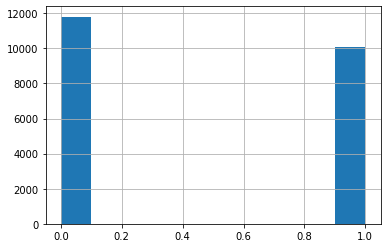

In [168]:
(df_binary['acne']*1).hist()

In [169]:
df_binary.columns

Index(['atopic_dermatitis', 'rosacea_inflammatory',
       'rosacea_erythemato_telangiectasique', 'peri_oral_dermatitis',
       'seborrheic_keratosis', 'psoriasis_vulgar', 'seborrheic_dermatitis',
       'nummular_eczema', 'tinea_versicolor', 'chronic_hand_eczema',
       'vulgar_warts', 'folliculitis', 'alopecia_androgenic', 'dyshidrosis',
       'nevus', 'melasma', 'alopecia_areata', 'intertrigo', 'urticaria',
       'vitiligo', 'keratosis_pilaris', 'molluscum', 'cheilitis_eczematous',
       'tinea_corporis', 'prurigo_nodularis', 'actinic_keratosis',
       'genital_warts', 'plane_warts', 'pityriasis_rosae', 'melanonychia',
       'psoriasis_pustular_palmoplantar', 'granuloma_annulare',
       'psoriasis_guttate', 'lichen_simplex_chronicus', 'shingles',
       'herpes_simplex', 'acne_cystic', 'acne_scars', 'acne_mixed',
       'acne_excoriated', 'acne_comedos', 'acne'],
      dtype='object')

In [170]:
max_value = 80
subsample_max_per_disease = {
    'acne_mixed':3800,
    'acne_cystic': 676,
    'acne_scars': 350,
    'acne_comedos': 255,
    'acne_excoriated': 250,
    'peri_oral_dermatitis': 550,
    'folliculitis': 400,
    'rosacea_inflammatory': 550,
    'rosacea_erythemato_telangiectasique': 550,
    'melasma': 400,
    'seborrheic_dermatitis': 400,
    'plane_warts': 400}

In [171]:
def sample_per_disease(column, df, num_images, max_value, subsample_max_per_disease):
    if column in subsample_max_per_disease.keys():
        max_value = subsample_max_per_disease[column]
    
    if num_images > max_value:
        print(f'{column} has {num_images}, but max value is {max_value}.')
        idx= df[df[column]==True].sample(n= num_images - max_value,random_state=42).index
        df.drop(idx, axis=0, inplace=True)
        df.reset_index(drop=True, inplace=True)
        num_images = df[column].value_counts()[True]
        #print(f'{column} has now {num_images}.')

In [172]:

def sample_with_max_value(df,  max_value, subsample_max_per_disease):
    for column in df.columns:
        try:
            if column != 'pathBucketImage' and column !='acne':
                num_images = df[column].value_counts()[True] 
                sample_per_disease(column, df, num_images, max_value, subsample_max_per_disease)
        except:
            pass
    return df


In [173]:
max_value = 80
subsample_max_per_disease = {
    'acne_mixed':3800,
    'acne_cystic': 676,
    'acne_scars': 350,
    'acne_comedos': 255,
    'acne_excoriated': 250,
    'peri_oral_dermatitis': 550,
    'folliculitis': 400,
    'rosacea_inflammatory': 550,
    'rosacea_erythemato_telangiectasique': 550,
    'melasma': 400,
    'seborrheic_dermatitis': 400,
    'plane_warts': 400}
df_binary = sample_with_max_value(df_binary,  max_value, subsample_max_per_disease)

atopic_dermatitis has 1589, but max value is 80.
rosacea_inflammatory has 929, but max value is 550.
rosacea_erythemato_telangiectasique has 935, but max value is 550.
peri_oral_dermatitis has 939, but max value is 550.
seborrheic_keratosis has 371, but max value is 80.
psoriasis_vulgar has 684, but max value is 80.
seborrheic_dermatitis has 586, but max value is 400.
nummular_eczema has 194, but max value is 80.
tinea_versicolor has 530, but max value is 80.
chronic_hand_eczema has 455, but max value is 80.
vulgar_warts has 236, but max value is 80.
folliculitis has 677, but max value is 400.
alopecia_androgenic has 483, but max value is 80.
dyshidrosis has 325, but max value is 80.
nevus has 452, but max value is 80.
alopecia_areata has 219, but max value is 80.
intertrigo has 245, but max value is 80.
urticaria has 200, but max value is 80.
vitiligo has 196, but max value is 80.
keratosis_pilaris has 177, but max value is 80.
molluscum has 160, but max value is 80.
cheilitis_eczemat

False    4634
True     4522
Name: acne, dtype: int64


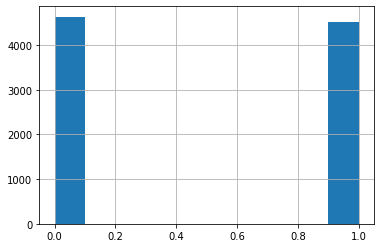

In [175]:
print(df_binary['acne'].value_counts())
(df_binary['acne']*1).hist()